# Lab Day One - E1

/tmp/ipykernel_954/2855571741.py:20: RuntimeWarning: overflow encountered in exp
  return ((8*(np.pi**2)*h*(c**2)*(R**2))/((Lambda**5)*(np.exp((h*c)/(Lambda*k*T))-1)))


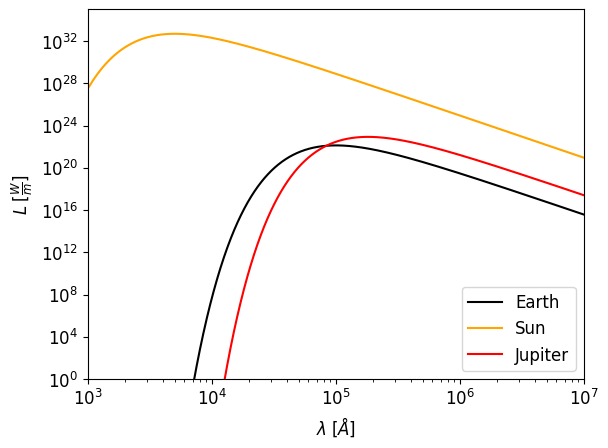

In [70]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
from intersection import *

font = {'size'   : 12}
plt.rc('font', **font)

earth = {"T": 290, "R": 6.3781*10**6, "M": 5.972e24}
sun = {"T": 5772, "R": 6.9570*10**8, "M": 1.989*10**(30)}
jupiter = {"T": 160, "R": 7.1492*10**7, "M": 1.899*10**(27)}

c = 2.99792458*10**8
h = 6.62607015*10**(-34)
k = 1.380649*10**(-23)
G = 6.6726*10**(-11)
AU = 149.5979*10**9

def luminosity(Lambda, T, R):
    return ((8*(np.pi**2)*h*(c**2)*(R**2))/((Lambda**5)*(np.exp((h*c)/(Lambda*k*T))-1)))

def get_meter_from_angstrom(a):
    return a*(10**(-10))
def get_angstrom_from_meter(a):
    return a/(10**(-10))

def luminosity_jupiter_thermal(wavelength):
    return luminosity(get_meter_from_angstrom(wavelength), jupiter["T"], jupiter["R"])

def luminosity_jupiter_reflected(wavelength):
    return luminosity(get_meter_from_angstrom(wavelength), sun["T"], sun["R"]) * 7.179*10**(-10)

x = np.arange(10**3, 10**7, 10**2)
y_earth = [luminosity(get_meter_from_angstrom(wavelength), earth["T"], earth["R"]) for wavelength in x]
y_sun = [luminosity(get_meter_from_angstrom(wavelength), sun["T"], sun["R"]) for wavelength in x]
y_jupiter = [luminosity(get_meter_from_angstrom(wavelength), jupiter["T"], jupiter["R"]) for wavelength in x]

fig, axs = plt.subplots()
axs.loglog(x, y_earth, label="Earth", color="black")
axs.loglog(x, y_sun, label="Sun", color="orange")
axs.loglog(x, y_jupiter, label="Jupiter", color="red")
axs.set_xscale("log", base=10)
axs.legend(loc="lower right")
axs.set_ylim(10**(0), 1e35)
axs.set_xlim(10**(3), 10**7)
axs.set_xlabel(r"$\lambda \;[\AA]$")
axs.set_ylabel(r"$L \;[\frac{W}{m}]$")
plt.savefig("saved_images/E1.pdf", format="pdf", bbox_inches="tight")

plt.show()


# E4

In [2]:
def difference_jupiter(x):
    # return (((32*(np.pi**2)*h*(c**2)*(jupiter["R"]**2))/((x**5)*(np.exp((h*c)/(x*k*jupiter["T"]))-1)))*(1-(7.179*10**(-10))))
    return luminosity(x, sun["T"], sun["R"])*(7.179*10**(-10)) - luminosity(x, jupiter["T"], jupiter["R"])

def solve_intersection(input_func):
    initial_guess = get_meter_from_angstrom(10**5)
    return fsolve(input_func, initial_guess)[0]

crosssection_point = (get_angstrom_from_meter(solve_intersection(difference_jupiter)))
print(crosssection_point)

56504.83375460279


# E5

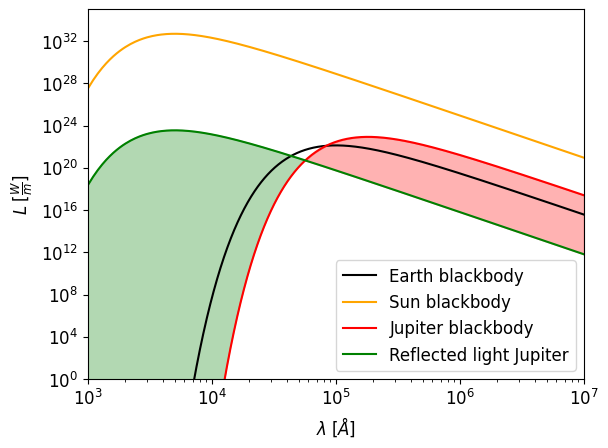

In [38]:
y_jupiter_reflected = [value*(7.179*10**(-10)) for value in y_sun]

fig, axs = plt.subplots()
axs.loglog(x, y_earth, label="Earth blackbody", color="black")
axs.loglog(x, y_sun, label="Sun blackbody", color="orange")
axs.loglog(x, y_jupiter, label="Jupiter blackbody", color = "red")
axs.loglog(x, y_jupiter_reflected, label="Reflected light Jupiter", color="green")
axs.set_xscale("log", base=10)
axs.legend(loc="lower right")
axs.set_ylim(10**(0), 1e35)
axs.set_xlim(10**(3), 10**7)
axs.set_xlabel(r"$\lambda \;[\AA]$")
axs.set_ylabel(r"$L \;[\frac{W}{m}]$")

crosssection_point_pos = 0
for pos, val in enumerate(x):
    if val > crosssection_point:
        crosssection_point_pos = pos
        break

plt.fill_between(x[crosssection_point_pos:], y_jupiter[crosssection_point_pos:], y_jupiter_reflected[crosssection_point_pos:], color="red", alpha=0.3)
plt.fill_between(x[:crosssection_point_pos], y_jupiter_reflected[:crosssection_point_pos], y_jupiter[:crosssection_point_pos], color="green", alpha=0.3)

plt.savefig("saved_images/E1_change.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [84]:
print(get_angstrom_from_meter(500*10**(-9)))
value_thermal = luminosity(500*10**(-9), jupiter["T"], jupiter["R"])
value_reflected = luminosity(500*10**(-9), sun["T"], sun["R"])*(7.179*10**(-10))
fraction_at_500nm = value_reflected/value_thermal
print(fraction_at_500nm)

5000.000000000001
5.982223800089218e+68


# E6

42500 83300


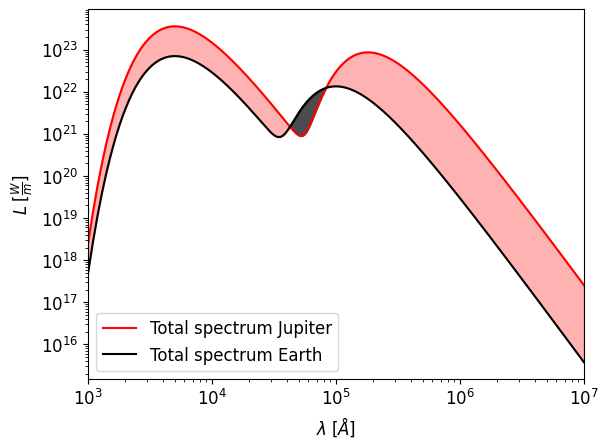

In [4]:
y_earth_reflected = [value*(1.4087*10**(-10)) for value in y_sun]
# add values of each list: the blackbody emission and the reflection:
y_tot_jupiter = [value + y_jupiter_reflected[pos] for pos, value in enumerate(y_jupiter)]
y_tot_earth = [value + y_earth_reflected[pos] for pos, value in enumerate(y_earth)]

fig, axs = plt.subplots()
axs.loglog(x, y_tot_jupiter, label="Total spectrum Jupiter", color="red")
axs.loglog(x, y_tot_earth, label="Total spectrum Earth", color="black")
axs.set_xscale("log", base=10)
axs.legend(loc="lower left")
# axs.set_ylim(10**(12), None)
axs.set_xlim(10**(3), 10**7)
axs.set_xlabel(r"$\lambda \;[\AA]$")
axs.set_ylabel(r"$L \;[\frac{W}{m}]$")

def find_intersections_pos(x, f, g):
    y_difference_tot = [value - y_tot_earth[pos] for pos, value in enumerate(y_tot_jupiter)]
    sign_changes = np.where(np.diff(np.sign(y_difference_tot)))[0] # Find indices where the sign of the difference changes
    return sign_changes
intersec = find_intersections_pos(x, y_tot_earth, y_tot_jupiter)
print(x[intersec[0]], x[intersec[1]])

plt.fill_between(x[:intersec[0]], y_tot_jupiter[:intersec[0]], y_tot_earth[:intersec[0]], color="red", alpha=0.3)
plt.fill_between(x[intersec[0]:intersec[1]], y_tot_jupiter[intersec[0]:intersec[1]], y_tot_earth[intersec[0]:intersec[1]], color="black", alpha=0.7)
plt.fill_between(x[intersec[1]:], y_tot_jupiter[intersec[1]:], y_tot_earth[intersec[1]:], color="red", alpha=0.3)

plt.savefig("saved_images/E6.pdf", format="pdf", bbox_inches="tight")
plt.show()

# E7

In [71]:
mercury = {"M": 3.30e23, "a": 0.38*AU}
jupiter["a"] = 5.2*AU
earth["a"] = AU
planets_list = [mercury, earth, jupiter]

def K_max(a_p, M_p):
    return (2*np.pi*G)**(1/3)*(sun["M"]/(4*np.pi**2*a_p**3))**(1/6)*(M_p/(sun["M"]**(2/3)))

for planet in planets_list:
    print(K_max(planet["a"], planet["M"]))

0.39805250850645446
4.440562864035994
619.2150688207802


# E8

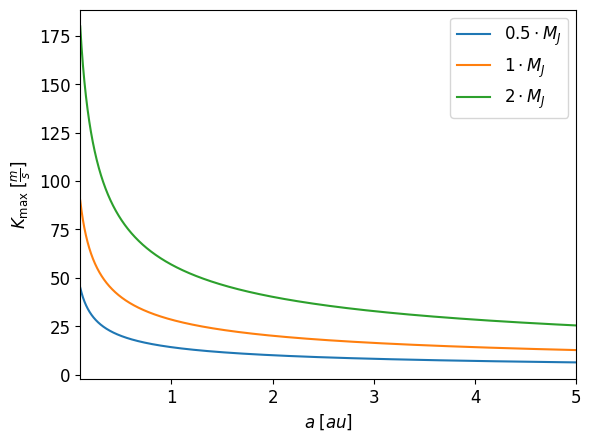

In [66]:
M_p_list = [0.5*jupiter["M"], 1*jupiter["M"], 2*jupiter["M"]] # list of planet masses

def velocity(a, M_p):
    return (2*np.pi*G*((G/(4*np.pi**2))*(sun["M"]/(a**3)))**(1/2))**(1/3)*(M_p/(sun["M"]**(2/3)))


x_velocity = np.arange(0.1, 5, 0.001)
y_values = []
for mass in M_p_list:
    y_values.append([velocity(a*AU, mass) for a in x_velocity]) # creates y data for every planet mass
    
fig, axs = plt.subplots()
axs.plot(x_velocity, y_values[0], label=r"$0.5 \cdot M_J$")
axs.plot(x_velocity, y_values[1], label=r"$1 \cdot M_J$")
axs.plot(x_velocity, y_values[2], label=r"$2 \cdot M_J$")
axs.set_xlabel(r"$a \;[au]$")
axs.set_ylabel(r"$K_\text{max} \;[\frac{m}{s}]$")
axs.legend()
axs.set_xlim(0.1, 5)

plt.savefig("saved_images/E8.pdf", bbox_inches="tight")
plt.show()


# E10

In [5]:
planet_masses = [2*jupiter["M"], 4*jupiter["M"], 6*jupiter["M"], 8*jupiter["M"], 10*jupiter["M"]]
M_threshold = 13*jupiter["M"]

def probability(M_pl):
    return 1-np.sqrt(1-(M_pl/M_threshold)**2)

print("Probability brown dwarf &", end=" ")
for mass in planet_masses:
    print(f"\SI{{{round(probability(mass)*100, 2)}}}{{\percent}}", end=" & ")
print("\\")

M_threshold = 80*jupiter["M"]

print("Probability main-sequence star &", end=" ")
for mass in planet_masses:
    print(f"\SI{{{round(probability(mass)*100, 2)}}}{{\percent}}", end=" & ")
print("")

Probability brown dwarf & \SI{1.19}{\percent} & \SI{4.85}{\percent} & \SI{11.29}{\percent} & \SI{21.18}{\percent} & \SI{36.1}{\percent} & \
Probability main-sequence star & \SI{0.03}{\percent} & \SI{0.13}{\percent} & \SI{0.28}{\percent} & \SI{0.5}{\percent} & \SI{0.78}{\percent} & 


# E11

In [ ]:
venus = {"R": 6.05*10**6, "a": 0.72*AU}

def tr_depth(R_p):
    return (R_p/sun["R"])**2

def tr_duration(R_p, a_p):
    return (sun["R"] + R_p)*np.sqrt((4*a_p)/(G*sun["M"]))

def tr_probability(a_p):
    return sun["R"]/a_p

def min_inclination(a_p):
    return np.arccos(tr_probability(a_p))

# values in list, so that for each tuple (planet): (Name, radius, major half axis)
required_values = [("Venus", venus["R"], venus["a"]), ("Earth", earth["R"], earth["a"]), ("Jupiter", jupiter["R"], jupiter["a"])]
for planet in required_values:
    print(rf"{planet[0]} & \num{{{tr_depth(planet[1]):.2e}}} & \num{{{tr_duration(planet[1], planet[2]):.2e}}} & \num{{{100*tr_probability(planet[2]):.2e}}} & \num{{{min_inclination(planet[2]):.2e}}}", end="\\\ \n")

Venus & \num{7.56e-05} & \num{4.00e+04} & \num{6.46e-01} & \num{1.56e+00}\\ 
Earth & \num{8.41e-05} & \num{4.71e+04} & \num{4.65e-01} & \num{1.57e+00}\\ 
Jupiter & \num{1.06e-02} & \num{1.17e+05} & \num{8.94e-02} & \num{1.57e+00}\\ 


# E12

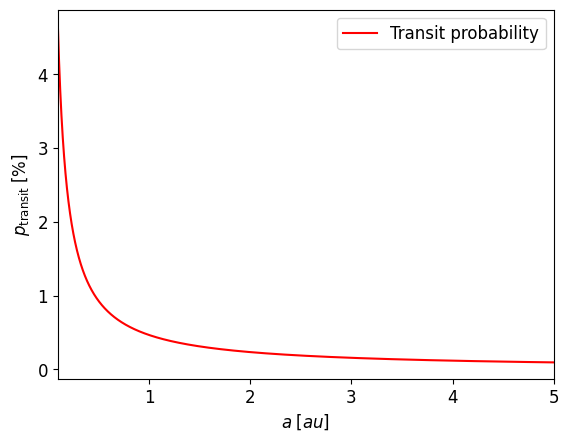

In [27]:
y_transit_probability = [(100*tr_probability(a*AU)) for a in x_velocity] # creates data for the sun as a G2V star

fig, axs = plt.subplots()
axs.plot(x_velocity, y_transit_probability, label="Transit probability", color="red")
axs.set_xlabel(r"$a \;[au]$")
axs.set_ylabel(r"$p_{\text{transit}} \;[\%]$")
axs.legend()
axs.set_xlim(0.1, 5)

plt.savefig("saved_images/E12.pdf", bbox_inches="tight")
plt.show()

# E15

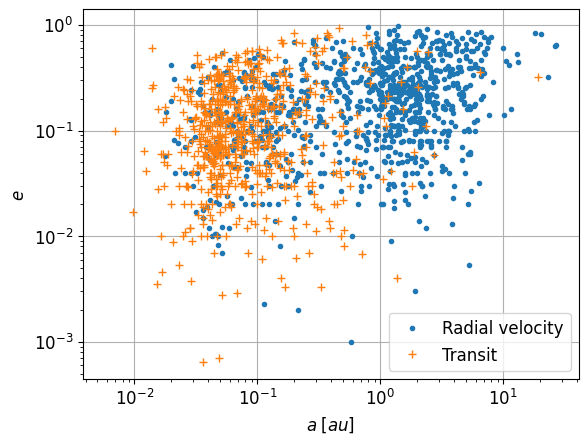

In [64]:
import pandas as pd

data_radial_v = pd.read_csv("exoplanet.eu_catalog_radial_velocity.csv")
# print(data_radial_v.columns)
data_transit = pd.read_csv("exoplanet.eu_catalog_transit.csv")

# e = data["eccentricity"].dropna().fillna(0).tolist()
# dropna() removes possible NaN, fillna(0) replaces the empty slots with 0, tolist() makes a list from the data

e_radial_v = data_radial_v["eccentricity"].to_list()
e_radial_v_error = [data_radial_v["eccentricity_error_min"].to_list(), data_radial_v["eccentricity_error_max"].to_list()]

e_transit = data_transit["eccentricity"].to_list()

a_radial_v = data_radial_v["semi_major_axis"]
a_radial_v_error = [data_radial_v["semi_major_axis_error_min"], data_radial_v["semi_major_axis_error_max"]]
a_transit = data_transit["semi_major_axis"]

fig, axs = plt.subplots()
# axs.errorbar(e_radial_v, a_radial_v, yerr=a_radial_v_error, xerr=e_radial_v_error, fmt="o", label="Radial velocity", ecolor="grey")
axs.loglog(a_radial_v, e_radial_v, ".", label="Radial velocity")
axs.loglog(a_transit, e_transit, "+", label="Transit")
axs.set_xscale("log", base=10)
axs.set_yscale("log", base=10)
axs.set_xlabel(r"$a \; [au]$")
axs.set_ylabel(r"$e$")
axs.legend()
axs.grid()

plt.savefig("saved_images/E15.pdf", bbox_inches="tight")
plt.show()